## Using Python to Draw Phase Diagrams

It is possible to quickly generate some plots of a system of differential equations using inbuilt python packages numpy and scipy, and the SymPy module.

Using the Lotka- Volterra predator-prey interaction model as an example, here is a guide to:

- plotting the system in time and phase space, 
- plotting a quiver plot with nullclines
- calculating the eigenvalues from the Jacobian

The Lotka- Volterra model describes the relationship between the population of predators and prey in an area, and is given by the equations below:

## - $\frac{du}{dt}=x(2-x-y)      =f(x,y)$

## - $\frac{dv}{dt}=y(-1+x)      =g(x,y)$


In [4]:
import numpy as np
from scipy.integrate import odeint
import sympy as sm
#import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib




### Firstly, the equations are entered in the form of a function which generates a numpy array. The function requires an array with $[x_0, y_0]$, and returns an array of $[\frac{dx}{dt}, \frac{dy}{dt}]$

In [7]:
# define system in terms of a Numpy array
def Sys(X, t=0):
    
    return np.array([ 2*X[0] - X[0]**2 - X[0]*X[1] , - X[1] + X[0]*X[1] ])


### Then, the system is integrated over an array of t values, from initial x and y values using the scipy function *odeint*. 

type "help(integrate.odeint)" if you want more information about integrate.odeint inputs and outputs.

In [8]:

t = np.linspace(0, 20,  1000)  # array of 1000 t values from t = 0 to t= 20

Sys0 = np.array([10, 2]) # initial values for the system: x0 = 10, y0 = 2


X, infodict = odeint(Sys, Sys0, t, full_output=True) #the odeint function returns the integrated values
                                                        #and information about the integration as a dictionary, 
                                                        #here assigned the value 'infodict'

x,y = X.T #the X variable has an attribute T, which is the range of X values over the array of t values.

### The results of this integration can be plotted over time and in phase space using the *matplotlib* library

This involves creating a figure with two subplots, using one to plot x and y against t, and the other to plot x against y.
Matplotlib functions are very explicitly named, and more information on their use can be found at the [matplotlib cookbook](https://matplotlib.org/).



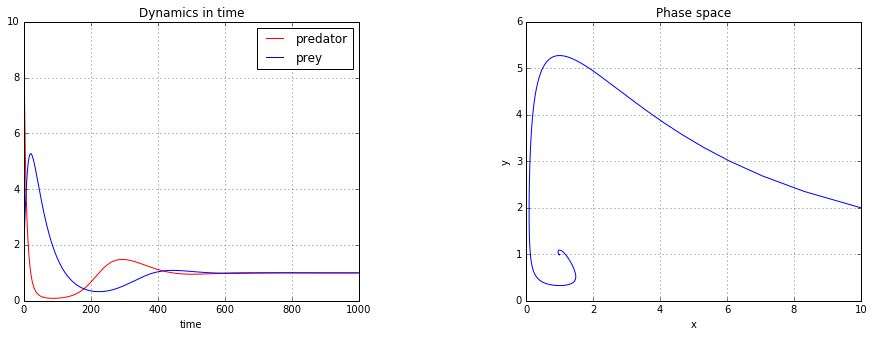

In [9]:
#plot
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(x, 'r-', label='predator')
ax1.plot(y, 'b-', label='prey')
ax1.set_title("Dynamics in time")
ax1.set_xlabel("time")
ax1.grid()
ax1.legend(loc='best')

ax2.plot(x, y, color="blue")
ax2.set_xlabel("x")
ax2.set_ylabel("y")  
ax2.set_title("Phase space")
ax2.grid()

### Calculate equilibria of system using sympy
Firstly, the equations must be rewritten in sympy format. Then, the equations are set to zero using the sympy function *Eq*, then the equilibria are calculated by solving the equations using the function *solve*. 

This outputs an array of the fixed points, assigned to the variable *equilibria*.

In [10]:
# for clarity x = r (for resource) and y = c (for consumer) 
r, c = sm.symbols('r, c', negative=False)
R = 2*r - r**2 - r*c
C = - c + r*c

# use sympy's way of setting equations to zero
REqual = sm.Eq(R, 0)
CEqual = sm.Eq(C, 0)

# compute fixed points
equilibria = sm.solve( (REqual, CEqual), r, c )

equilibria

[(0, 0), (1, 1), (2, 0)]

### Using matplotlib.quiver.

To generate a quiverplot, the direction of the derivative at each point plotted on a graph that is overlaid with the nullclines and equilibria.

Here, there is a lot of code but the important part 

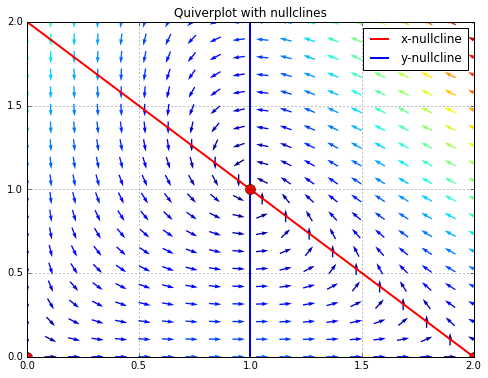

In [11]:
fig2 = plt.figure(figsize=(8,6))

x = np.linspace(0,2,20)
y = np.arange(0,2,20)

# plot nullclines
plot([0,2],[2,0], 'r-', lw=2, label='x-nullcline')
plot([1,1],[0,2], 'b-', lw=2, label='y-nullcline')

# plot fixed points
for point in equilibria:
    plot(point[0],point[1],"red", marker = "o", markersize = 10.0)
plt.title("Quiverplot with nullclines")
plt.legend(loc='best')

# quiverplot
# define a grid and compute direction at each point
x = np.linspace(0, 2, 20)
y = np.linspace(0, 2, 20)

X1 , Y1  = np.meshgrid(x, y)                    # create a grid
DX1, DY1 = Sys([X1, Y1])                        # compute growth rate on the grid
M = (np.hypot(DX1, DY1))                        # norm growth rate 
M[ M == 0] = 1.                                 # avoid zero division errors 
DX1 /= M                                        # normalize each arrows
DY1 /= M

plt.quiver(X1, Y1, DX1, DY1, M, pivot='mid')
plt.legend()
plt.grid()

### Using sympy to compute the jacobian and eigenvalues

Once the equations have been defined in sympy, the jacobian can be calculated using sympy's *jacobian* function.
Iterating over the equilibria allows for the calculation of eigenvalues. 

In [12]:
# put equations into matrix-form and compute Jacobian-matrix  
eqMat = sm.Matrix([ R, C ])
Mat = sm.Matrix([ r, c ])
jacMat = eqMat.jacobian(Mat)
print('Jacobian %s' % jacMat)
print('---------------------')

# iterate through list of equilibria
for item in equilibria:
    eqmat = jacMat.subs([ (r, item[0]), (c, item[1]) ])
    print('The eigenvalues for the fixed point (%s, %s) are %s and %s' 
          %(item[0], item[1], list(eqmat.eigenvals().items())[0], list(eqmat.eigenvals().items())[1]))
    print('-------------------------------------------')

Jacobian Matrix([[-c - 2*r + 2, -r], [c, r - 1]])
---------------------
The eigenvalues for the fixed point (0, 0) are (2, 1) and (-1, 1)
-------------------------------------------
The eigenvalues for the fixed point (1, 1) are (-1/2 - sqrt(3)*I/2, 1) and (-1/2 + sqrt(3)*I/2, 1)
-------------------------------------------
The eigenvalues for the fixed point (2, 0) are (1, 1) and (-2, 1)
-------------------------------------------
